## Three Dimensional Plotting in Matplotlib

Maatplotlib was initially designed with only two dimensional plotting in mind. Around the time of 1.0 release some three dimensional plotting utilities were built on the top of Matplotlib's two dimensional display, and the result is a convinent(in some what limited) set of tools for three dimensional and data visualization. Three dimensional plots are enabled by importing the mplot3d toolkit, included with the main Matplotlib installation.

In [1]:
from mpl_toolkits import mplot3d

Once the sub module is imported a three dimensional axis can be created by passing the keyword projection='3d' to any of the normal axes creation routines:

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

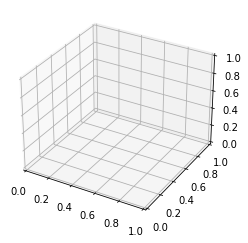

In [4]:
fig= plt.figure ()
ax=plt.axes (projection= '3d')

With the Three dimensional axes enabled we can now plot a variety of three dimensional plot types. The three dimensional plottingis one of the functionalities that benifits immensely from viewing figures interactively rather than statistically in the notebook, recall that to use interactive figures, you can use %matplotlib notebook rather than %matplotlib inlinewhen running this code

# Three Dimensional points & lines

YTe most basic three dimensional plot is a line or scatter plot created from (x, y, z) triples. In analogy with more common two dimensional plots discussed earlier, these can be created using the ax.plot3D and ax.scatter3D functions. The call signature for these is nearly identicle to that of their two dimensional counterparts for more information on controlling the output. Here we will plot a trigomical spiral along with some points drawn randomly near the line

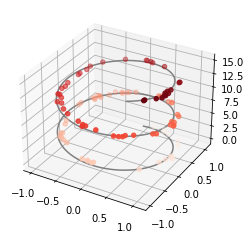

In [14]:
ax = plt.axes (projection = '3d')

#data for 3dimensional line
zline = np.linspace (0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'grey')

#data for 3dimensional scattered points
zdata =15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.random(100)
ydata = np.cos(zdata) + 0.1 * np.random.random(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata,cmap='Reds');



Notice that by default the scatter plot have their transparency adjusted to give a sense of depth on the page. While the three dimensional effect is sometimes difficult to see with in a static image, an interactive image view can lead to some nice intution abot the layouts of the points.

# Three Dimensional Countour Plots

Anologus to the contour plot we explored in mplot3d contains tools to create 3dim. relief plots using the same inputs. Like two dimensional ax.countour plots, ax.countour3D requires all the I/P data to be in the form of two dimensional regual grids, with the Z data evaluated @ eah pt.. Here we will show a 3dim. contour diagram of a three dimensional sinusoidal function

In [15]:
def f(x, y):
    return np.sin(np.sqrt( x ** 2 + y ** 2))
x = np.linspace (-6, 6, 30)
y = np.linspace (-6, 6, 30)
X, Y = np.meshgrid(x,y)
Z=f(X, Y)

Text(0.5, 0, 'z')

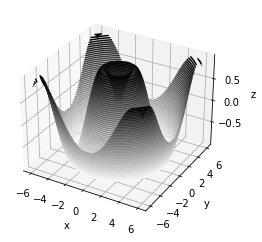

In [19]:
fig = plt.figure()
ax = plt.axes (projection ='3d')
ax.contour3D(X, Y, Z, 50,cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example we'll use an elevation of 60 degrees(i.e. 60degree above the x-y plane and an azimuth of 35 degree(i.e. rotated 35 degrees counter clockwiseabout the z-axis

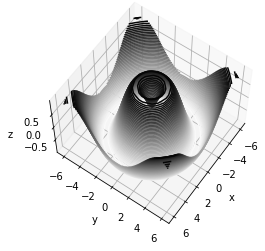

In [20]:
ax.view_init(60, 35)
fig

## Wire frame & Surface plots
Two other types of three dimensionaal plots that work on grided data are wireframe & surface plots. These take a grid of values & projectit onto the specified three-dimensional surface & can make the three-dimensional forms quite easy to visualize. Here is an exampleof wireframe

Text(0.5, 0.92, 'wireframe')

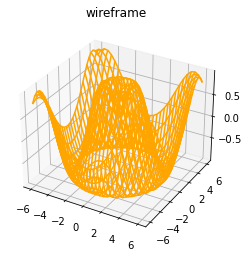

In [23]:
fig = plt.figure()
ax = plt.axes (projection ='3d')
ax.plot_wireframe(X, Y, Z, color ='orange')
ax.set_title('wireframe')

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon, Adding a colour map to the filled polygons can aid perception of the topology
of the surface being visualized


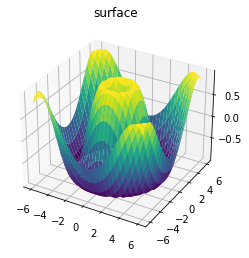

In [25]:
ax = plt.axes (projection ='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

#Note that through the grid of values for a surface plot needs to be two dimensional, it need not be rectilinear, Here is an example of creating a partial polar grid, which when used with the surface 3D plotcan giveus a slice into the function we are visualizing

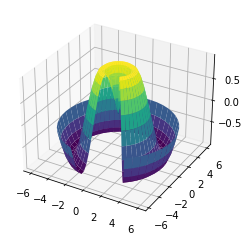

In [31]:
r = np.linspace(0, 6, 20)
theta = np.linspace (-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid (r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f (X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
               cmap='viridis', edgecolor='none');

A surface plot is like a wireframe, but each frame of the wireframe is a filled polgons can aid perception of the topology of the surface being visualized

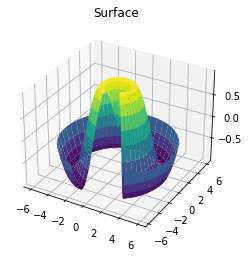

In [32]:
ax = plt.axes (projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1,
                cmap = 'viridis', edgecolor = 'none')
ax.set_title('Surface');
                

#Surface Triangluation#

For some applications, the evenly sampled grids required by the above routines is overly restrictive & inconvinent. In these situation the triangulation based plots can be very useful What if rather than an even draw from Cartesian or polargrid , we instead have a set of random draws

In [34]:
theta = 2 *np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f (x, y)


We could create a scatter plot of the points to get an idea of the surface we are sampling for

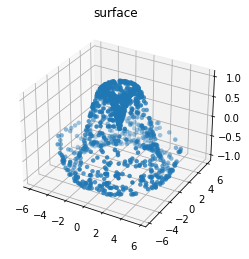

In [38]:
ax = plt.axes(projection ='3d')
ax.scatter(x, y, z, edgecolor='none')
ax.set_title('surface');